# Alex Walczak | EE 222 | HW 10 | Spring 2017
#### https://inst.eecs.berkeley.edu/~ee222/sp17/homework_sp17/problem10.pdf

In [1]:
# Import libraries
# Created with Python 2.7
%matplotlib inline
from __future__ import division
import numpy as np
import sympy
from sympy import *
init_printing(use_latex='mathjax') # initialize pretty printing
from IPython.display import display # use instead of 'print' for pretty printing

# Problem 1: Magnetic Levitation System
### Setup

In [2]:
# Add symbols to namespace
var('x1 x2 x3 G k m L0 L1 a R u')

# Helper function L(x1)
def L(x1_val):
    x1 = Symbol('x1')
    expr = L0 + L1 / (1 + x1 / a)
    return expr.subs(x1, x1_val)

# System dynamics (xi' = fi(x))
f1 = x2
f2 = G - (k / m) * x2 - L0 * a * x3 ** 2 / (2 * m * (a + x1) ** 2)
f3 = (1 / L(x1)) * (-R * x3 + L0 * a * x2 * x3 / (a + x1) ** 2)
f = Matrix([f1, f2, f3])
g = Matrix([0, 0, 1 / L(x1)])
x_prime = f + g * u
x = Matrix([x1, x2, x3])
print('Examine system dynamics in symbolic form')
display(x_prime)

# Examine equilibria in symbolic form
print('Examine equilibria in symbolic form')
display(solve(x_prime, x))

# Examine Jacobian in symbolic form
print('Examine Jacobian in symbolic form')
J = x_prime.jacobian(x)
display(J)

Examine system dynamics in symbolic form


⎡              x₂               ⎤
⎢                               ⎥
⎢                 2             ⎥
⎢          L₀⋅a⋅x₃      k⋅x₂    ⎥
⎢   G - ───────────── - ────    ⎥
⎢                   2    m      ⎥
⎢       2⋅m⋅(a + x₁)            ⎥
⎢                               ⎥
⎢              L₀⋅a⋅x₂⋅x₃       ⎥
⎢              ────────── - R⋅x₃⎥
⎢                      2        ⎥
⎢     u        (a + x₁)         ⎥
⎢─────────── + ─────────────────⎥
⎢       L₁               L₁     ⎥
⎢L₀ + ──────      L₀ + ──────   ⎥
⎢         x₁               x₁   ⎥
⎢     1 + ──           1 + ──   ⎥
⎣         a                a    ⎦

Examine equilibria in symbolic form


⎡⎛            __________      ⎞  ⎛            __________      ⎞⎤
⎢⎜     √2⋅u⋅╲╱ G⋅L₀⋅a⋅m      u⎟  ⎜     √2⋅u⋅╲╱ G⋅L₀⋅a⋅m      u⎟⎥
⎢⎜-a - ─────────────────, 0, ─⎟, ⎜-a + ─────────────────, 0, ─⎟⎥
⎣⎝          2⋅G⋅R⋅m          R⎠  ⎝          2⋅G⋅R⋅m          R⎠⎦

Examine Jacobian in symbolic form


⎡                                         0                                   
⎢                                                                             
⎢                                             2                               
⎢                                      L₀⋅a⋅x₃                                
⎢                                    ───────────                              
⎢                                              3                              
⎢                                    m⋅(a + x₁)                               
⎢                                                                             
⎢                                                              ⎛L₀⋅a⋅x₂⋅x₃    
⎢                                                           L₁⋅⎜────────── - R
⎢                                                              ⎜        2     
⎢        2⋅L₀⋅a⋅x₂⋅x₃                   L₁⋅u                   ⎝(a + x₁)      
⎢- ─────────────────────── + ───────────────────────

### 1(a): Find $i_{ss}$, $v_{ss}$ when $y$ is identically $0.05$ m.

In [3]:
# If yD = x1D = 0.05 and yD' = x2D = 0.00 occurs at an equilibrium point,
# then we must be able to find some x3D and u
# such that x' = f(x, u) = 0.

# Set parameters
G = 9.81
k = 0.001
R = 10.
m = 0.01
a = 0.05
L0 = 0.01
L1 = 0.02

# Reset dynamic equations with parameters set to above values.
f1 = x2
f2 = G - (k / m) * x2 - L0 * a * x3 ** 2 / (2 * m * (a + x1) ** 2)
f3 = (1 / L(x1)) * (-R * x3 + L0 * a * x2 * x3 / (a + x1) ** 2)
f = Matrix([f1, f2, f3])
g = Matrix([0, 0, 1 / L(x1)])
x_prime = f + g * u
x = Matrix([x1, x2, x3])

# Set state so that we assume we've reached constant yD = 0.05. Also recompute Jacobian.
J = x_prime.jacobian(x)
J = J.subs([(x1, 0.05), (x2, 0.00)])

# Solve for s.s. current and input voltage at yD. Check if solution exists and makes sense.
print('Set state to desired and solve for i_ss, v_ss, checking if solution makes sense:')
x_prime = x_prime.subs([(x1 , 0.05), (x2, 0.00)])
ss = solve(x_prime, x3, u)[1]  # (solves x' = 0), takes first/second (negative/positive) solution.
display(ss)
i_ss, v_ss = ss

Set state to desired and solve for i_ss, v_ss, checking if solution makes sense:


(1.9809088823063, 19.809088823063)

### Discussion 1(a)
We have shown that $x_3 = i_{ss} = 1.981$ A, and $u = v_{ss} = R \cdot i_{ss} = 19.81$ V as Ohm's Law predicts. Since a solution to $f(x, u) = 0$ exists, we know $y$ identically 0.05 m is an equilibrium.

### 1(b): Show instability of above equilibrium.

In [4]:
J_at_eq = J.evalf(4, subs={x3 : i_ss, u: v_ss}, chop=True)
print('Jacobian evaluated at equilibrium:')
display(J_at_eq)
print('Eigenvalues:')
J_at_eq.berkowitz_eigenvals() 

Jacobian evaluated at equilibrium:


⎡  0     1.0     0   ⎤
⎢                    ⎥
⎢196.2  -0.1   -9.905⎥
⎢                    ⎥
⎣  0    4.952  -500.0⎦

Eigenvalues:


{-499.903347144138: 1, -14.1079533207851: 1, 13.9097379649227: 1}

### 1(b) Discussion
The eigenvalues of the Jacobian evaluated at the equilibrium (-499.9, -14.1, 13.9) do not all lie in the open left half plane, so the equilibrium is unstable.

### 1(c): Design a state feedback control law to stabilize the ball at desired position $y_D = 0.05$.

In [5]:
# Dynamic equations (with parameters set).
f1 = x2
f2 = G - (k / m) * x2 - L0 * a * x3 ** 2 / (2 * m * (a + x1) ** 2)
f3 = (1 / L(x1)) * (-R * x3 + L0 * a * x2 * x3 / (a + x1) ** 2)
f = Matrix([f1, f2, f3])
g = Matrix([0, 0, 1 / L(x1)])
x_prime = f + g * u
x = Matrix([x1, x2, x3])

print('System dynamics with parameter values substituted:')
display(x_prime)

# Output
y = Matrix([x1]) # Want to regulate output to 0.05 m.
def h(x):
    return y.subs(x, x)

print('Output:')
display(h(x))

# Lie derivative helper functions.
def gradient(scalar_function, variables):
    # gradient multivar scalar function (row vector of partial derivaties)
    matrix_scalar_function = Matrix([scalar_function])
    return matrix_scalar_function.jacobian(variables)


def LieD(func, along_trajectories_of, with_variables):
    # Computes the Lie derivative (wrt time) of func (always scalar?) along trajectories of a vector field.
    return gradient(func, with_variables).dot(along_trajectories_of)

System dynamics with parameter values substituted:


⎡                    x₂                     ⎤
⎢                                           ⎥
⎢                          2                ⎥
⎢                  0.025⋅x₃                 ⎥
⎢       -0.1⋅x₂ - ──────────── + 9.81       ⎥
⎢                            2              ⎥
⎢                 (x₁ + 0.05)               ⎥
⎢                                           ⎥
⎢                     0.0005⋅x₂⋅x₃          ⎥
⎢                     ──────────── - 10.0⋅x₃⎥
⎢                                2          ⎥
⎢        u            (x₁ + 0.05)           ⎥
⎢────────────────── + ──────────────────────⎥
⎢           0.02                   0.02     ⎥
⎢0.01 + ───────────     0.01 + ───────────  ⎥
⎣       20.0⋅x₁ + 1            20.0⋅x₁ + 1  ⎦

Output:


[x₁]

### Differentiate output $h$ until input $u$ appears.

In [6]:
def find_relative_degree(f, g, x, h):
    # of SISO system: x' = f(x) + g(x) * u, y = h(x).
    # Assuming h is not already a function of the input.
    r = 0
    L_prev_f_h = h
    while True:
        L_cur_f_h        =   LieD(L_prev_f_h, f, x)
        L_g_L_prev_f_h   =   LieD(L_prev_f_h, g, x)
        r += 1
        if L_g_L_prev_f_h != 0: # good: input has shown up in rth derivative of output
                                # (Note to self: shouldn't I be checking if magnitude bounded
                                # away from 0 in some nbhd of the eq. pt?)
            
            # Uncomment below three lines to view final Lie derivatives.
            # print "L_cur_f_h, L_g_L_prev_f_h:"
            # display(L_cur_f_h)
            # display(L_g_L_prev_f_h)
            break
        if L_cur_f_h == 0: # bad: if happens would never terminate.
            print 'Error!'
            return -1
        L_prev_f_h = L_cur_f_h
    return r

print 'Relative degree is: ' + str(find_relative_degree(f, g, x, y))

Relative degree is: 3


### Discussion 1(c)
It has been shown the relative degree of the system is $3$. Thus LgLf2_h = $\frac{0.05 x_3}{(0.01 + \frac{0.02}{20.0 x_1 + 1}) (x_1 + 0.05)^{2}}$, and choosing $u$ according to lecture 22-1 with coefficients ensuring poles in OLHP will let us regulate output to $y_D$.

### 1(d): Discuss how the DOA of the desired equilibrium using this control law would compare to that using a standard linear control law, computed from a Jacobian linearization of the maglev system.

### Discussion
Since the relative degree is $\gamma = n = 3$, the system is **full state linearizable**, and thus minimum phase (trivial zero dynamics). With the above feedback linearizing control law, we can achieve globally asymptotically stable tracking of $y_D$ (by Lecture 22-1), so the DOA is $\mathbb{R}^3$

With a standard linear control law using the Jacobian linearization, we would be linearizing highly nonlinear dynamics about an unstable equilibrium point, so we would expect the DOA to be a small neighborhood.

# Problem 2: Conventional Take-Off and Landing (CTOL) Aircraft Control
### Setup

In [15]:
# Add variables to namespace
# Notation: (...)_kp = kth time derivative of (...)
from sympy.abc import alpha, gamma, epsilon, theta
var('x z x_p z_p x_2p z_2p theta_p theta_2p u1 u2 a_L a_D L D c')

gamma = atan(z_p / x_p)
alpha = theta - gamma
L = a_L * (x_p ** 2 + z_p ** 2) * (1 + c * alpha)
D = a_D * (x_p ** 2 + z_p ** 2)
theta_2p = u2

# Rotation matrix
def R(theta):
    Rot = Matrix([
        [cos(theta),-sin(theta)],
        [sin(theta), cos(theta)]])
    return Rot

# We'll define full state: s = (x', x, z', z, theta', theta).
s = Matrix([x_p, x, z_p, z, theta_p, theta])
f_pre = R(theta) * R(alpha).T * Matrix([-D, L]) + Matrix([0, -1])
g1_pre = R(theta) * Matrix([1, 0])
g2_pre = R(theta) * Matrix([0, epsilon])

# System dynamics
f  = Matrix([  f_pre[0],   x_p,   f_pre[1],   z_p,   0,   theta_p ])
g1 = Matrix([ g1_pre[0],     0,  g1_pre[1],     0,   0,         0 ])
g2 = Matrix([ g2_pre[0],     0,  g2_pre[1],     0,   1,         0 ])

s_p = f + g1 * u1 + g2 * u2

# Output
def h1(s):
    M = Matrix([0, 1, 0, 0, 0, 0])
    return M.dot(s)
    
def h2(s):
    M = Matrix([0, 0, 0, 1, 0, 0])
    return M.dot(s)    

y1 = h1(s)
y2 = h2(s)

### Problem 2 continued.
#### Linearize the system from the inputs u1, u2 to the outputs y1 = x, y2 = z. Give the linearizing control law. 

In [16]:
# Add auxiliary variables v1, v2 to namespace (used to set control law u).
var('v1 v2')

def find_vector_relative_degree(f, g1, g2, s, h1, h2):
    # of MIMO (TITO) system: s' = f(s) + g1(s) * u1 + g2(s) * u2; y1 = h1(s), y2 = h2(s).
    # Assuming h1, h2 not already functions of the inputs.

    # We'll test singularity of a matrix A to determine if the systems has vector relative degree (r1, r2).
    A00, A01, A02, A03 = -1,-1,-1,-1 # See EE 222 lecture notes 18 page 13.
    L_r1_f_h1, L_r2_f_h2 = None, None # Will set later.
    
    # Do one at a time. Start with differentiating y1 until u1 OR u2 appears.
    L_prev_f_h = h1
    r1 = 0
    while True:
        L_cur_f_h        =   LieD(L_prev_f_h,  f, s)
        L_g1_L_prev_f_h  =   LieD(L_prev_f_h, g1, s)
        L_g2_L_prev_f_h  =   LieD(L_prev_f_h, g2, s)
        r1 += 1
        if L_g1_L_prev_f_h != 0 or L_g2_L_prev_f_h != 0: # good: input has shown up in r1-th derivative of output
                                # (Note to self: shouldn't I be checking if magnitude bounded
                                # away from 0 in some nbhd of the eq. pt?)
            print "u appeared! (1)"
            A00, A01 = L_g1_L_prev_f_h, L_g2_L_prev_f_h
            L_r1_f_h1 = L_cur_f_h # r1-th Lie derivative of h1 along f.
            break
        if L_cur_f_h == 0: # bad: if happens and previous conditions failed, alg would never terminate.
            print 'Error! ' + str(r1)
            r1 = -1
            break
        L_prev_f_h = L_cur_f_h
    
    # Now, differentiate y2 until u1 OR u2 appears.
    L_prev_f_h = h2
    r2 = 0
    while True:
        L_cur_f_h        =   LieD(L_prev_f_h,  f, s)
        L_g1_L_prev_f_h  =   LieD(L_prev_f_h, g1, s)
        L_g2_L_prev_f_h  =   LieD(L_prev_f_h, g2, s)
        r2 += 1
        if L_g1_L_prev_f_h != 0 or L_g2_L_prev_f_h != 0: # good: input has shown up in r2-th derivative of output
            print "u appeared! (2)"
            A10, A11 = L_g1_L_prev_f_h, L_g2_L_prev_f_h
            L_r2_f_h2 = L_cur_f_h # r2-th Lie derivative of h2 along f.
            break
        if L_cur_f_h == 0: # bad: if happens and previous conditions failed, alg would never terminate.
            print 'Error! ' + str(r2)
            r2 = -1
            break
        L_prev_f_h = L_cur_f_h

    assert r1 != -1 and r2 != -1, 'Error! (3)'
    
    print('A(s):')
    A = Matrix([[A00, A01],[A10, A11]])
    display(A)
    
    print("Determinant of A(s):")
    display(A.det())
    
    print("Inverse of A(s):")
    display(Inverse(A))
    
    iA = Inverse(A)
    u = -iA * Matrix([L_r1_f_h1, L_r2_f_h2]) + iA * Matrix([v1, v2])
    
    return r1, r2, u

In [17]:
r1, r2, u = find_vector_relative_degree(f, g1, g2, s, h1(s), h2(s))
print 'Vector relative degree is: ' + str((r1, r2))

# Note to self: Didn't bother with putting in normal form. Why?
# Vector rel. deg. was needed to compute the fbk linearzing control law.
# Should I have put into normal form?

u appeared! (1)
u appeared! (2)
A(s):


⎡cos(θ)  -ε⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  ε⋅cos(θ) ⎦

Determinant of A(s):


     2           2   
ε⋅sin (θ) + ε⋅cos (θ)

Inverse of A(s):


                     -1
⎛⎡cos(θ)  -ε⋅sin(θ)⎤⎞  
⎜⎢                 ⎥⎟  
⎝⎣sin(θ)  ε⋅cos(θ) ⎦⎠  

Vector relative degree is: (2, 2)


### Discussion
Since the above $A$ matrix is nonsingular, we'll derive the feedback linearizing control law per EE 222 lecture notes 18 page 13.

### Problem 2 continued
#### Assume that the zero dynamics of the aircraft correspond to the aircraft flying at a constant altitude and constant horizontal velocity x' = v with v constant (trim). Derive the zero dynamics of the system. 

In [18]:
# Compute leftover dynamics after setting variables to zero dynamics values below:
v = Symbol('v') # constant horizontal velocity
alt = Symbol('alt') # constant vertical altitude

# Set aux input v1,v2 to zero since we're looking at zero dynamics (but not u=0).
# (First applied fbk linearizing control law, then set v1,v2 to zero.)
# (Doing a whole bunch of substitutions to see what's leftover.)
# (Vector relative degree (2, 2) so we expect 6 - 4 = 2 dimensional zero dynamics.)

substitutions = {x_2p : 0., x_p : v,
                 z_2p : 0., z_p : 0., z : alt,
                 v1 : 0, v2 : 0} 
u_subbed = u.subs(substitutions)
substitutions = {x_2p : 0., x_p : v,
                 z_2p : 0., z_p : 0., z : alt,
                 v1 : 0, v2 : 0,
                 u1 : u_subbed[0], u2 : u_subbed[1]}

print 'Zero dynamics in symbolic form:'
leftover = s_p.subs(substitutions)
leftover = trigsimp(leftover) # essential!!!
display(leftover)

Zero dynamics in symbolic form:


⎡                       0                       ⎤
⎢                                               ⎥
⎢                       v                       ⎥
⎢                                               ⎥
⎢                       0                       ⎥
⎢                                               ⎥
⎢                       0                       ⎥
⎢                                               ⎥
⎢       2          ⎛     2              ⎞       ⎥
⎢  a_D⋅v ⋅sin(θ)   ⎝a_L⋅v ⋅(c⋅θ + 1) - 1⎠⋅cos(θ)⎥
⎢- ───────────── - ─────────────────────────────⎥
⎢        ε                       ε              ⎥
⎢                                               ⎥
⎣                      θ_p                      ⎦

In [19]:
substitutions = {epsilon : 0.1, v : 0.17, a_D : 2., a_L : 30., c : 6.}
leftover2 = leftover.subs(substitutions)
print('Full 6 dimensional system dynamics evaluated for given parameters:')
display(leftover2)

# As expected, two dimensional dynamics leftover (theta , theta').
lo = Matrix([leftover2[5], leftover2[4]])
print('2 dimensional zero dynamics:')
display(lo)

# Lambda-fied vector field (fast!)
lf = lambdify((theta, theta_p), lo)

Full 6 dimensional system dynamics evaluated for given parameters:


⎡                      0                      ⎤
⎢                                             ⎥
⎢                    0.17                     ⎥
⎢                                             ⎥
⎢                      0                      ⎥
⎢                                             ⎥
⎢                      0                      ⎥
⎢                                             ⎥
⎢-10.0⋅(5.202⋅θ - 0.133)⋅cos(θ) - 0.578⋅sin(θ)⎥
⎢                                             ⎥
⎣                     θ_p                     ⎦

2 dimensional zero dynamics:


⎡                     θ_p                     ⎤
⎢                                             ⎥
⎣-10.0⋅(5.202⋅θ - 0.133)⋅cos(θ) - 0.578⋅sin(θ)⎦

In [12]:
# Plot zero dynamics phase portrait
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

def leftover_dynamics_DFE(x, t=0.0):
    theta1 = x[0]
    theta2 = x[1]
    return lf(theta1, theta2).squeeze() # results in change from a 2x1 matrix to 2 dim vector.

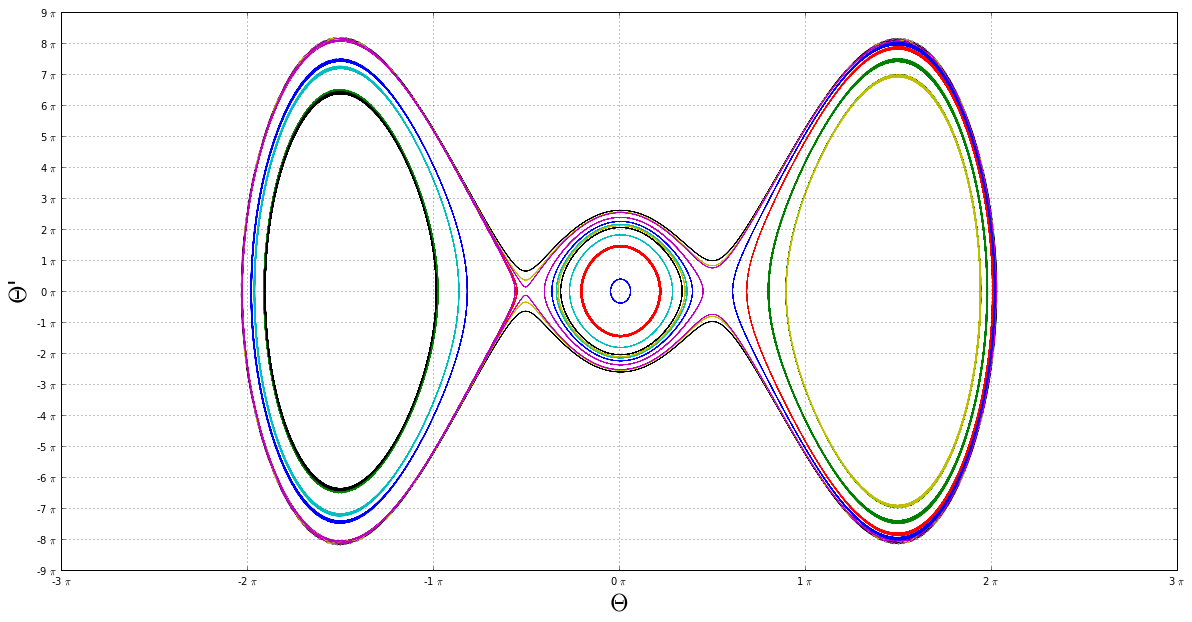

In [13]:
# Simulation of zero dynamics.

t = np.linspace(0, 20, 1000)
n = 24
random_initial_conditions = np.random.uniform(low=-pi, high=pi, size=(n, 2))

fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.set_xlabel('$\Theta $', fontsize=24)
ax.set_ylabel('$\Theta$\'', fontsize=24)
ax.grid()

for ic in random_initial_conditions:
    trajectory = odeint(leftover_dynamics_DFE, ic, t) / pi # divide values by pi because of axis formatting
    ax.plot(trajectory[:,0], trajectory[:,1], lw=0.5)

### Discussion
#### Can you predict from the zero dynamics what would actually happen if you used this control law for tracking for $\epsilon$ values greater than 0?
The zero dynamics suggest that the airplane would still maintain a constant altitude and horizontal velocity while tipping its nose up and down. For some initial conditions, the oscillations are of such large amplitude that the plane may break (and even loop around), which is not predicted by the zero dynamics.

#### Can you suggest an alternative approximate control law (no need to derive it in functional form, just suggest how you would derive it)?
A PID controller that compensates based on deviations from and accumulations of error (away from constant altitude and horizontal velocity).